In [1]:
"""
Kurtosis measures how “extreme” the ups and downs are in a set of data.

Kurtosis is a way to describe the shape of a distribution — specifically, how tall and skinny or short and flat the peak is, and how fat or thin the tails are (the edges of the graph).

🧁 Easy Analogy: Think of Cupcakes 🍰
Imagine baking cupcakes.

Some cupcakes rise a lot in the center (tall peak).

Some stay flat (low peak).

Some have batter that spills out to the sides (fat tails).

Kurtosis tells us how the data “piles up” around the average and how much data is way out at the extremes.


📊 Types of Kurtosis:
1. Normal Kurtosis (Mesokurtic)

Like a normal bell curve.

2. Tails are average, peak is average.

High Kurtosis (Leptokurtic)

Very tall peak and fat tails.

More chances of extreme events (big gains or losses).

3. Low Kurtosis (Platykurtic)

Flat peak and thin tails.

Less chance of extreme values.

"""



'\nKurtosis measures how “extreme” the ups and downs are in a set of data.\n\nKurtosis is a way to describe the shape of a distribution — specifically, how tall and skinny or short and flat the peak is, and how fat or thin the tails are (the edges of the graph).\n\n🧁 Easy Analogy: Think of Cupcakes 🍰\nImagine baking cupcakes.\n\nSome cupcakes rise a lot in the center (tall peak).\n\nSome stay flat (low peak).\n\nSome have batter that spills out to the sides (fat tails).\n\nKurtosis tells us how the data “piles up” around the average and how much data is way out at the extremes.\n\n\n📊 Types of Kurtosis:\n1. Normal Kurtosis (Mesokurtic)\n\nLike a normal bell curve.\n\n2. Tails are average, peak is average.\n\nHigh Kurtosis (Leptokurtic)\n\nVery tall peak and fat tails.\n\nMore chances of extreme events (big gains or losses).\n\n3. Low Kurtosis (Platykurtic)\n\nFlat peak and thin tails.\n\nLess chance of extreme values.\n\n'

[*********************100%***********************]  1 of 1 completed


^GSPC Kurtosis Analysis:
Actual Kurtosis: 15.8919
Excess Kurtosis: 12.8919


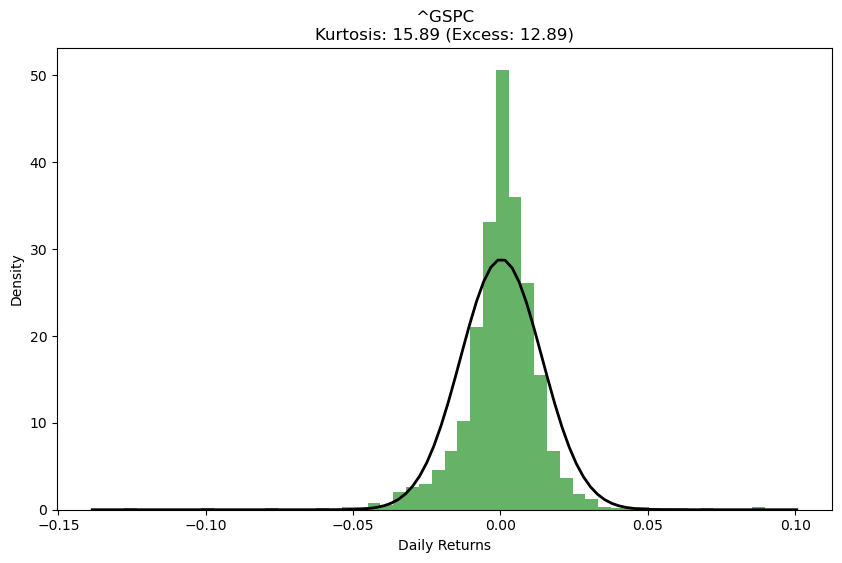

[*********************100%***********************]  1 of 1 completed


BTC-USD Kurtosis Analysis:
Actual Kurtosis: 16.2056
Excess Kurtosis: 13.2056


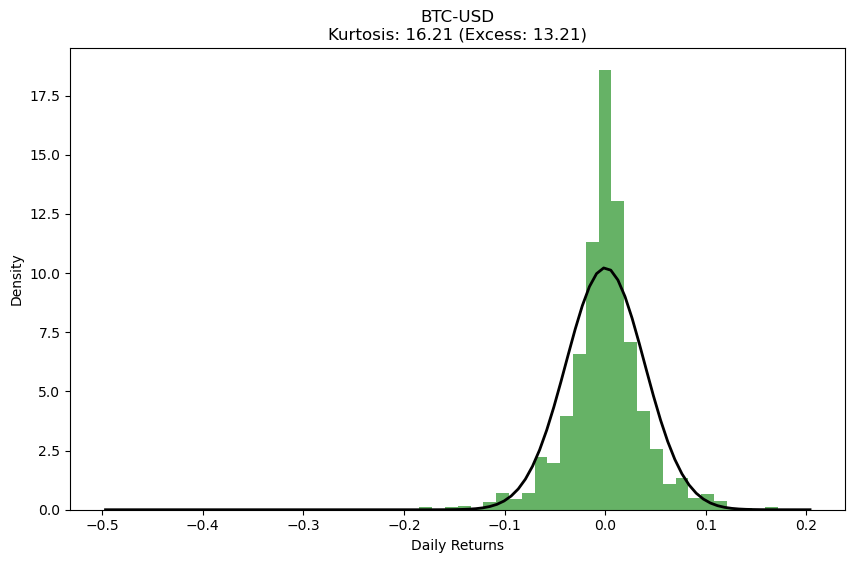

[*********************100%***********************]  1 of 1 completed


GC=F Kurtosis Analysis:
Actual Kurtosis: 7.8054
Excess Kurtosis: 4.8054


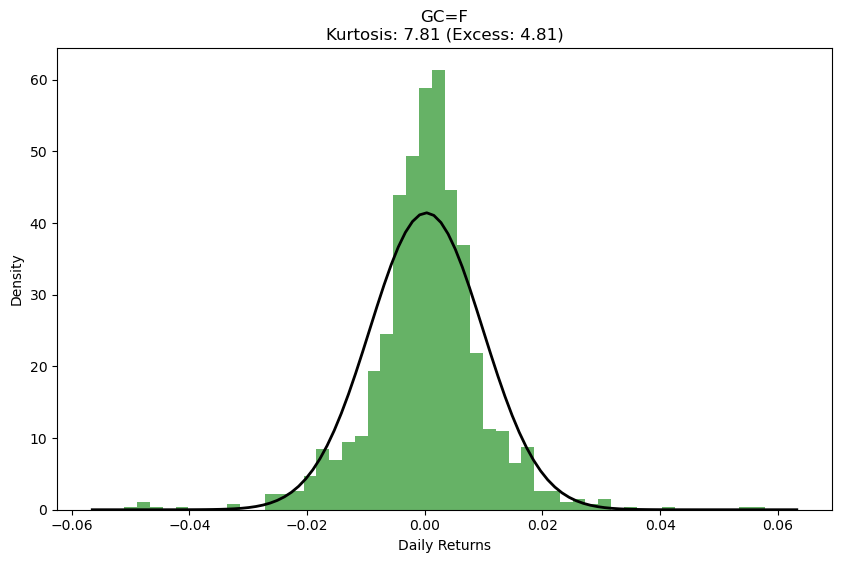

<Figure size 1200x600 with 0 Axes>

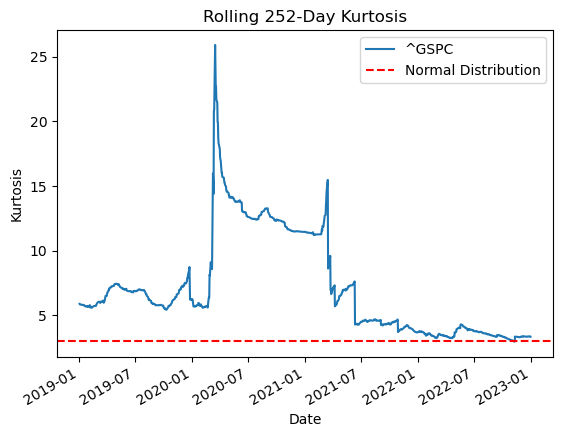


S&P 500 During COVID Market Crash Kurtosis Analysis:
Actual Kurtosis: 7.1356
Excess Kurtosis: 4.1356


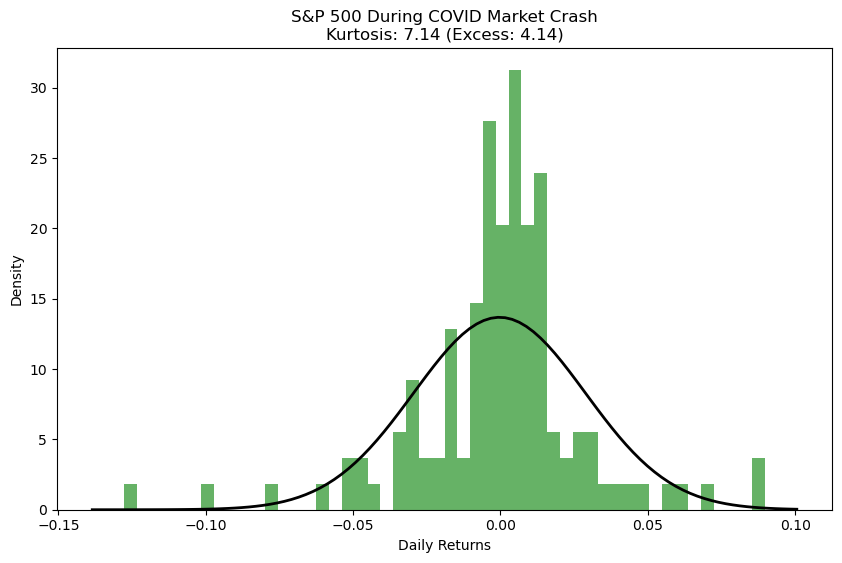

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# 1. Download financial time series data
def download_data(ticker, start_date, end_date):
    """
    Download stock data using Yahoo Finance API
    """
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True )
    return data['Close']

# 2. Calculate daily returns
def calculate_returns(prices):
    """
    Calculate daily logarithmic returns
    """
    return np.log(prices / prices.shift(1)).dropna()

# 3. Analyze kurtosis
def analyze_kurtosis(returns, title):
    """
    Calculate and visualize kurtosis of returns
    """
    # Calculate kurtosis
    kurt = kurtosis(returns, fisher=False)  # Fisher=False to get actual kurtosis
    excess_kurt = kurtosis(returns, fisher=True)  # Fisher=True for excess kurtosis
    
    returns = returns.values
    kurt = float(kurt)
    excess_kurt = float(excess_kurt)

    print(f"\n{title} Kurtosis Analysis:")
    print(f"Actual Kurtosis: {kurt:.4f}")
    print(f"Excess Kurtosis: {excess_kurt:.4f}")
    
    # Visualize
    plt.figure(figsize=(10, 6))
    plt.hist(returns, bins=50, density=True, alpha=0.6, color='g')
    
    # Plot normal distribution for comparison

    xmin, xmax = plt.xlim()
    x     = np.linspace(xmin, xmax, 100)
    mu    = float(returns.mean())
    sigma = float(returns.std())
    # normal PDF
    p = (1.0 / (sigma * np.sqrt(2 * np.pi))) * \
        np.exp(- (x - mu)**2 / (2 * sigma**2))

    plt.plot(x, p, 'k', linewidth=2)
    
    plt.title(f"{title}\nKurtosis: {kurt:.2f} (Excess: {excess_kurt:.2f})")
    plt.xlabel('Daily Returns')
    plt.ylabel('Density')
    plt.show()
    
    return kurt, excess_kurt

# 4. Compare different assets
def compare_assets(assets, start_date, end_date):
    """
    Compare kurtosis across different assets
    """
    results = {}
    
    for asset in assets:
        prices = download_data(asset, start_date, end_date)
        returns = calculate_returns(prices)
        kurt, excess_kurt = analyze_kurtosis(returns, asset)
        results[asset] = {
            'kurtosis': kurt,
            'excess_kurtosis': excess_kurt,
            'returns': returns
        }
    
    return results

# 5. Rolling kurtosis analysis
def rolling_kurtosis(returns, window=252):
    """
    Calculate rolling kurtosis over time
    """
    rolling_kurt = returns.rolling(window).apply(lambda x: kurtosis(x, fisher=False))
    
    plt.figure(figsize=(12, 6))
    rolling_kurt.plot()
    plt.title(f'Rolling {window}-Day Kurtosis')
    plt.xlabel('Date')
    plt.ylabel('Kurtosis')
    plt.axhline(y=3, color='r', linestyle='--', label='Normal Distribution')
    plt.legend()
    plt.show()
    
    return rolling_kurt

# Main execution
if __name__ == "__main__":
    # Define parameters
    assets = ['^GSPC', 'BTC-USD', 'GC=F']  # S&P 500, Bitcoin, Gold
    start_date = '2018-01-01'
    end_date = '2023-01-01'
    
    # Compare assets
    results = compare_assets(assets,start_date, end_date)
    
    # Analyze rolling kurtosis for S&P 500
    sp500_returns = results['^GSPC']['returns']
    rolling_kurt = rolling_kurtosis(sp500_returns)
    
    # Extreme event analysis (COVID market crash)
    covid_period = sp500_returns['2020-01-01':'2020-06-30']
    analyze_kurtosis(covid_period, "S&P 500 During COVID Market Crash")

In [ ]:
"""
Assignment Tasks
1. Data Collection & Basic Analysis:

Run the code to download and analyze different assets

Which asset has the highest kurtosis? What does this imply about its return distribution?

2. Parameter Exploration:

Modify the time period (try including the 2008 financial crisis)

Change the rolling window size for kurtosis calculation. How does this affect the results?

3. Extended Analysis:

Add more assets to compare (tech stocks, commodities, currencies)

Implement a function to test for statistically significant differences in kurtosis

4. Visualization Enhancement:

Create a QQ-plot to visually compare the distribution against normal

Plot kurtosis over time alongside price movements to identify patterns

5. Advanced Modeling:

Simulate normal returns with the same mean/std as your data and compare kurtosis

Research and implement methods to deal with high kurtosis in financial modeling

Key Questions to Consider
1. How does kurtosis change during market crises compared to calm periods?
2. What are the implications of high kurtosis for risk management?
3. How might kurtosis affect your choice of statistical models?
4. Can you identify periods where kurtosis was a leading indicator of volatility?
"""

[*********************100%***********************]  1 of 1 completed


^GSPC Kurtosis Analysis:
Actual Kurtosis: 15.8919
Excess Kurtosis: 12.8919


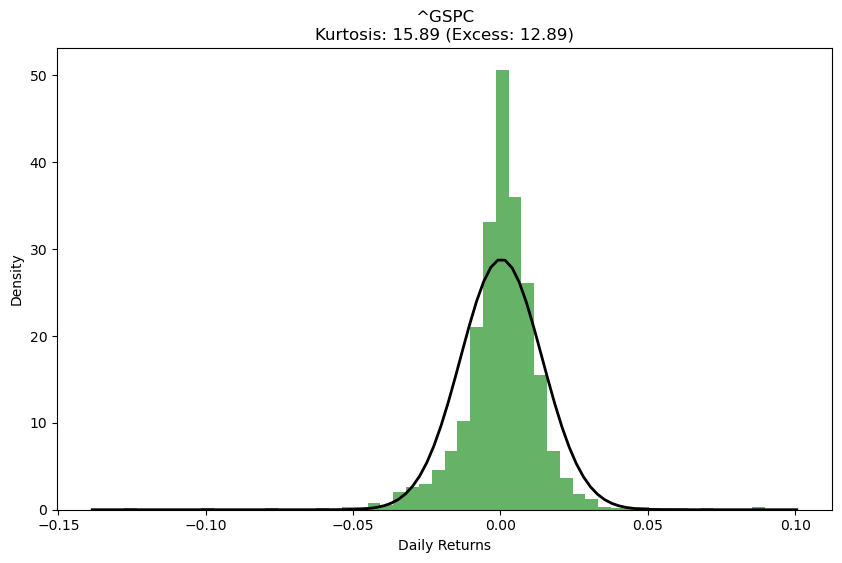

[*********************100%***********************]  1 of 1 completed


BTC-USD Kurtosis Analysis:
Actual Kurtosis: 16.2056
Excess Kurtosis: 13.2056


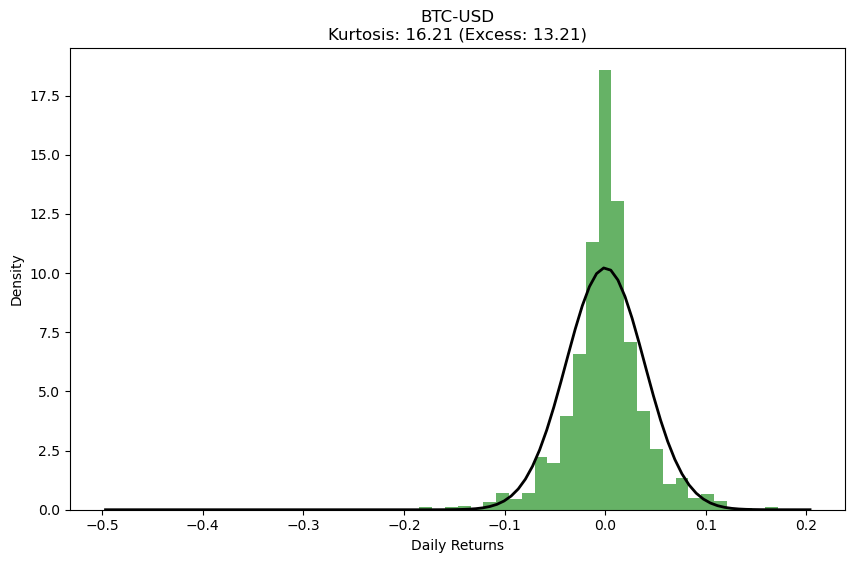

[*********************100%***********************]  1 of 1 completed


GC=F Kurtosis Analysis:
Actual Kurtosis: 7.8054
Excess Kurtosis: 4.8054


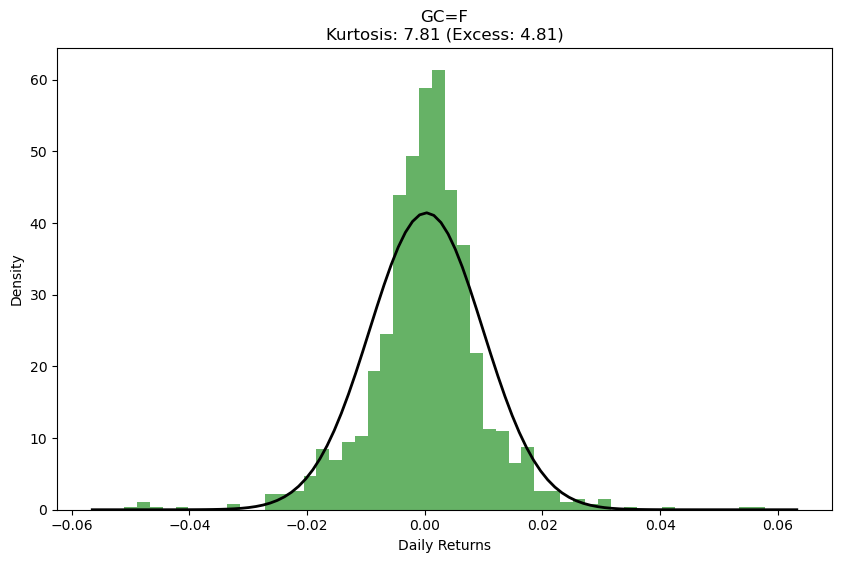

Kurtosis by asset: {'^GSPC': 15.891855997694492, 'BTC-USD': 16.205634854194, 'GC=F': 7.805436826498397}
Highest kurtosis: BTC-USD = 16.21


In [17]:
# Task 1


assets = ['^GSPC', 'BTC-USD', 'GC=F']  # S&P 500, Bitcoin, Gold
start_date, end_date = '2018-01-01', '2023-01-01'

results = compare_assets(assets, start_date, end_date)

# Collect just the kurtosis numbers
kurt_scores = {asset: results[asset]['kurtosis'] for asset in assets}
print("Kurtosis by asset:", kurt_scores)

# Find the max
highest = max(kurt_scores, key=kurt_scores.get)
print(f"Highest kurtosis: {highest} = {kurt_scores[highest]:.2f}")


In [ ]:
"""  
Bitcoin has the higest kurtosis, it implies its daily returns are usually small but it experiences big swings far more often than the S&P 500 or gold.

"""

[*********************100%***********************]  1 of 1 completed


^GSPC Kurtosis Analysis:
Actual Kurtosis: 14.8083
Excess Kurtosis: 11.8083


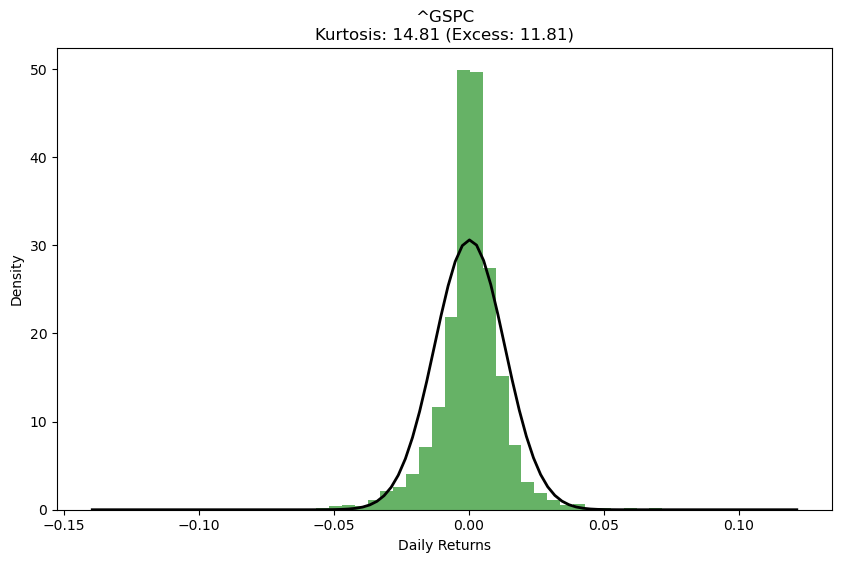

[*********************100%***********************]  1 of 1 completed


BTC-USD Kurtosis Analysis:
Actual Kurtosis: 13.8568
Excess Kurtosis: 10.8568


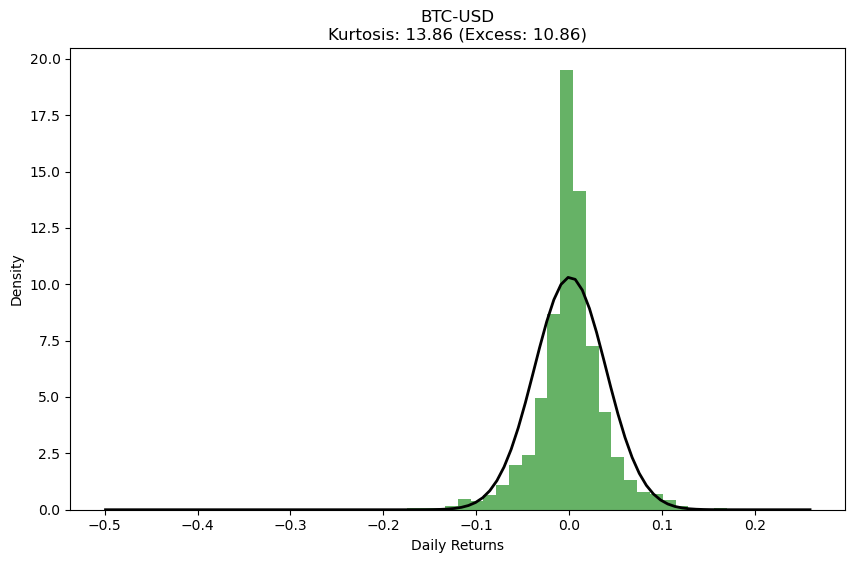

[*********************100%***********************]  1 of 1 completed


GC=F Kurtosis Analysis:
Actual Kurtosis: 8.6775
Excess Kurtosis: 5.6775


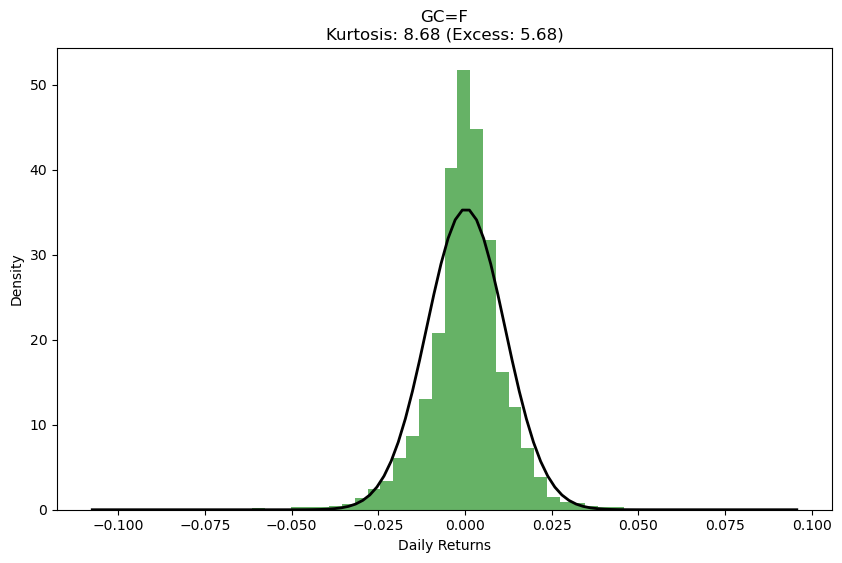

{'^GSPC': 14.8083037814998, 'BTC-USD': 13.856755364960446, 'GC=F': 8.677455347206399}


<Figure size 1200x600 with 0 Axes>

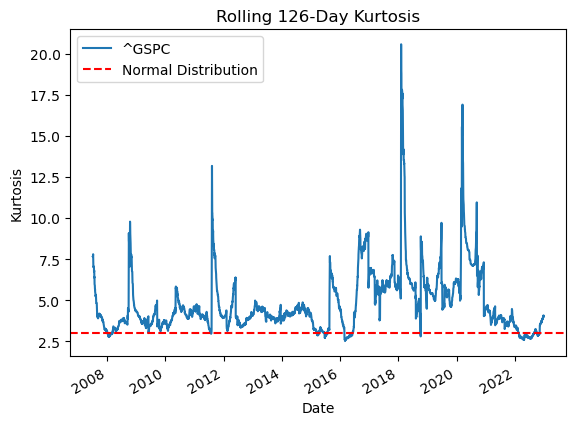

Ticker,^GSPC
Date,
2007-01-04,NaN
2007-01-05,NaN
2007-01-08,NaN
2007-01-09,NaN
2007-01-10,NaN
...,...
2022-12-23,4.002989
2022-12-27,4.081386
2022-12-28,4.049027


In [25]:
# Task 2

results_2008 = compare_assets(assets, '2007-01-01', '2023-01-01')
print({a: results_2008[a]['kurtosis'] for a in assets})


rolling_kurtosis(results_2008['^GSPC']['returns'], window=126)

In [ ]:
""" 
A short window makes the kurtosis line jump around a lot, reacting immediately to every big move but also adding a lot of noise. 
A long window smooths out those jumps and gives a steadier picture of tail risk, but it can be slow to show sudden shocks. 
A medium window sits in between, catching major events reasonably quickly without too much jitter.
"""

[*********************100%***********************]  1 of 1 completed


^GSPC Kurtosis Analysis:
Actual Kurtosis: 14.8083
Excess Kurtosis: 11.8083


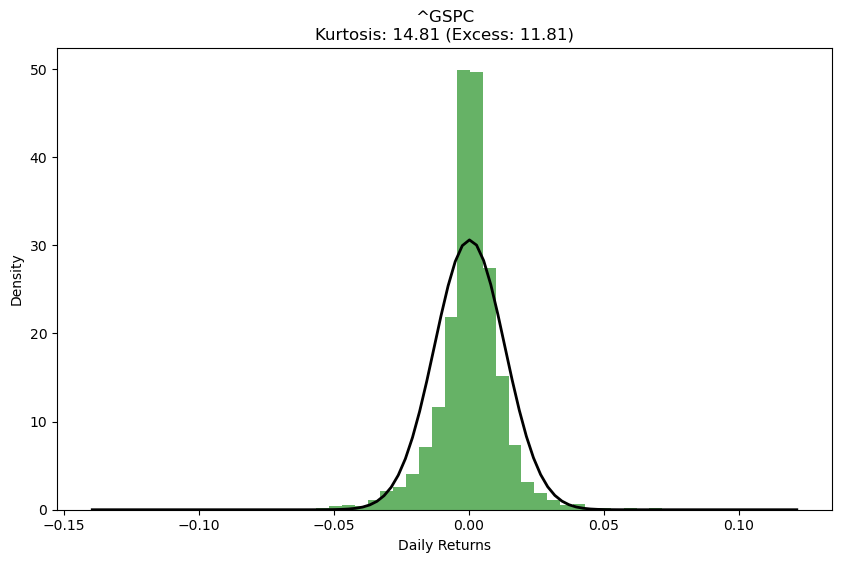

[*********************100%***********************]  1 of 1 completed


BTC-USD Kurtosis Analysis:
Actual Kurtosis: 13.8568
Excess Kurtosis: 10.8568


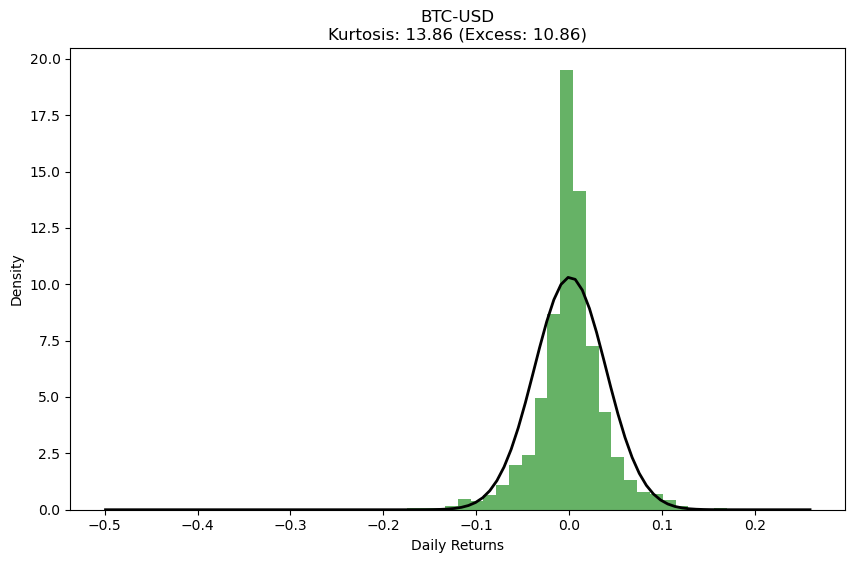

[*********************100%***********************]  1 of 1 completed



GC=F Kurtosis Analysis:
Actual Kurtosis: 8.6775
Excess Kurtosis: 5.6775


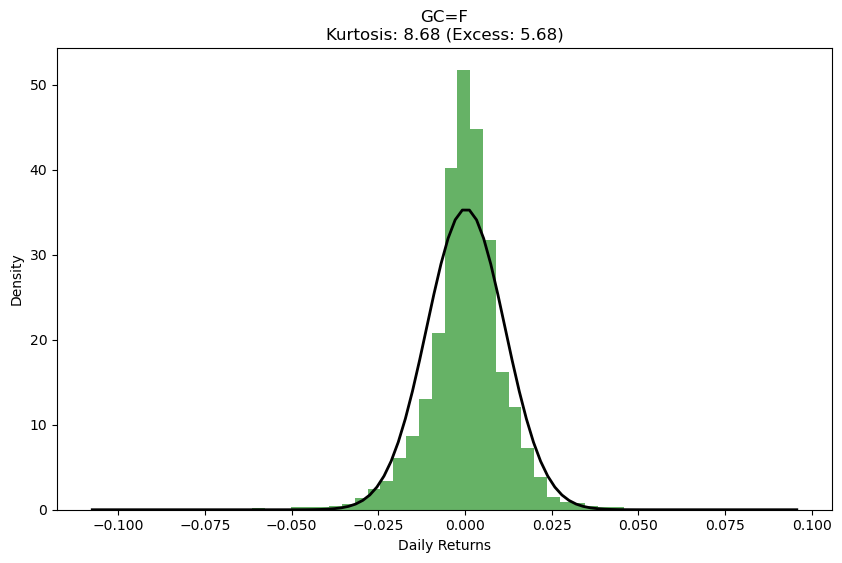

[*********************100%***********************]  1 of 1 completed


AAPL Kurtosis Analysis:
Actual Kurtosis: 9.4332
Excess Kurtosis: 6.4332


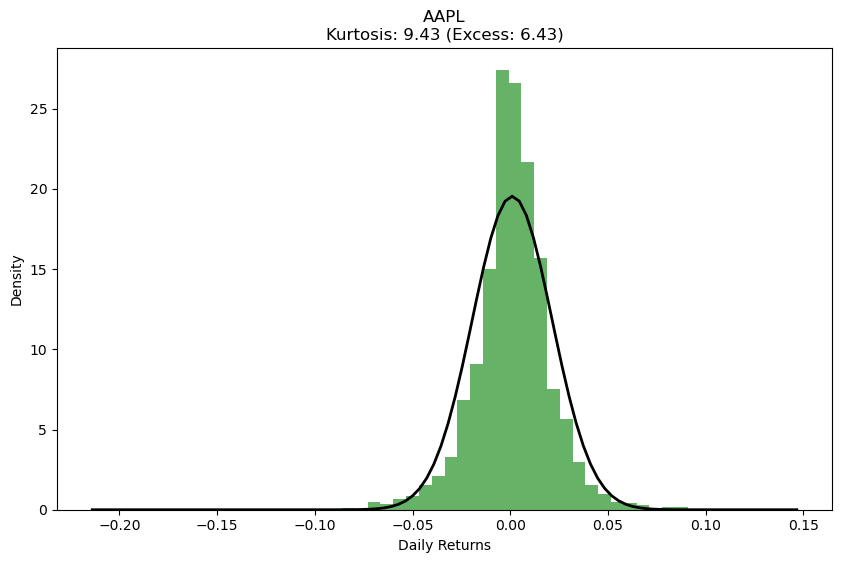

[*********************100%***********************]  1 of 1 completed


CL=F Kurtosis Analysis:
Actual Kurtosis: 21.7016
Excess Kurtosis: 18.7016



/Users/sushantbandgar/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


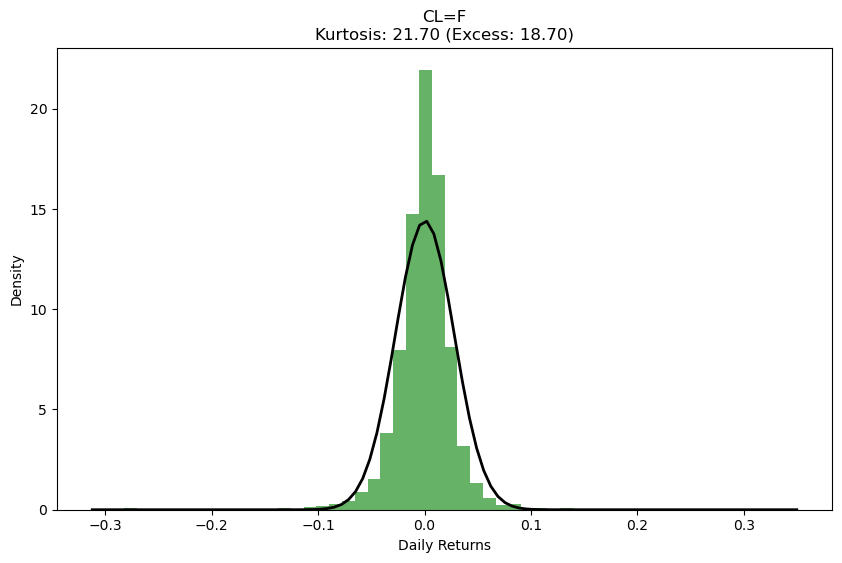

[*********************100%***********************]  1 of 1 completed


EURUSD=X Kurtosis Analysis:
Actual Kurtosis: 102.7793
Excess Kurtosis: 99.7793


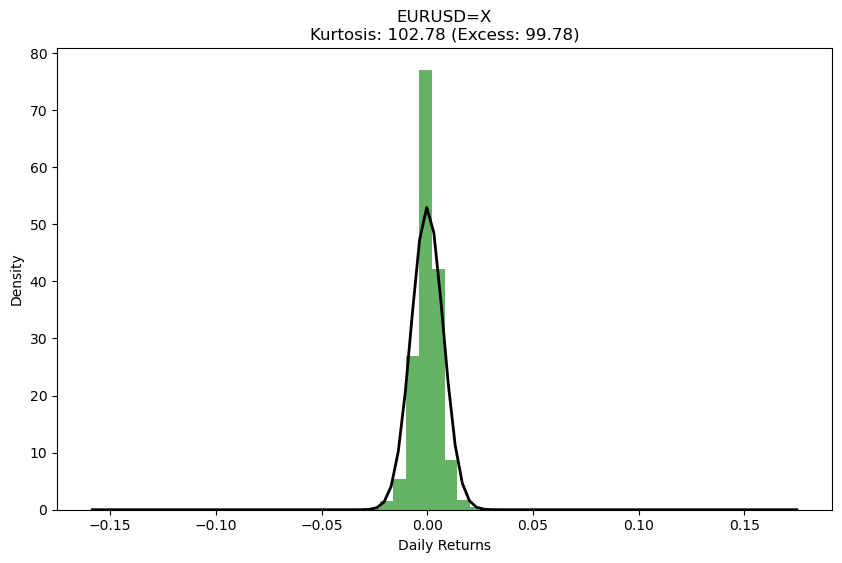

Δk = [5.19068813], p-value = 1.0


In [32]:
# Task 3

assets = ['^GSPC', 'BTC-USD', 'GC=F', 'AAPL', 'CL=F', 'EURUSD=X']
results_ext = compare_assets(assets, '2007-01-01', '2023-01-01')

import numpy as np
from scipy.stats import kurtosis


def kurtosis_diff_pvalue(r1, r2, n_boot=10000):
    obs = kurtosis(r1, fisher=False, bias=False) - kurtosis(r2, fisher=False, bias=False)
    pool = np.concatenate([r1, r2])
    n1 = len(r1)
    diffs = []
    for _ in range(n_boot):
        perm = np.random.permutation(pool)
        diffs.append(
            kurtosis(perm[:n1], fisher=False, bias=False)
          - kurtosis(perm[n1:], fisher=False, bias=False)
        )
    p = np.mean(np.abs(diffs) >= abs(obs))
    return obs, p


# Example: Bitcoin vs. S&P 500
r_btc = results_ext['BTC-USD']['returns']
r_sp  = results_ext['GC=F']['returns']
diff, pval = kurtosis_diff_pvalue(r_btc.values, r_sp.values)
print(f"Δk = {diff}, p-value = {pval}")



[*********************100%***********************]  1 of 1 completed


^GSPC Kurtosis Analysis:
Actual Kurtosis: 14.8083
Excess Kurtosis: 11.8083


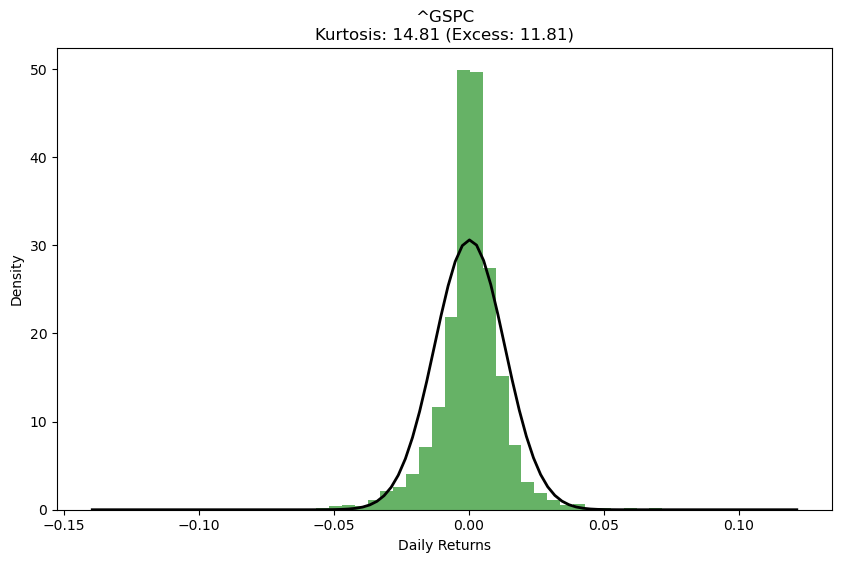

[*********************100%***********************]  1 of 1 completed


BTC-USD Kurtosis Analysis:
Actual Kurtosis: 13.8568
Excess Kurtosis: 10.8568


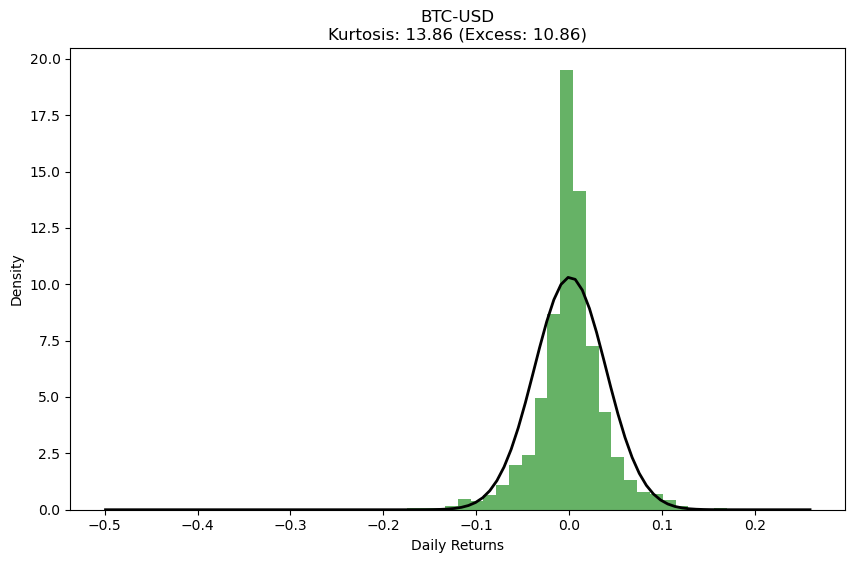

[*********************100%***********************]  1 of 1 completed



GC=F Kurtosis Analysis:
Actual Kurtosis: 8.6775
Excess Kurtosis: 5.6775


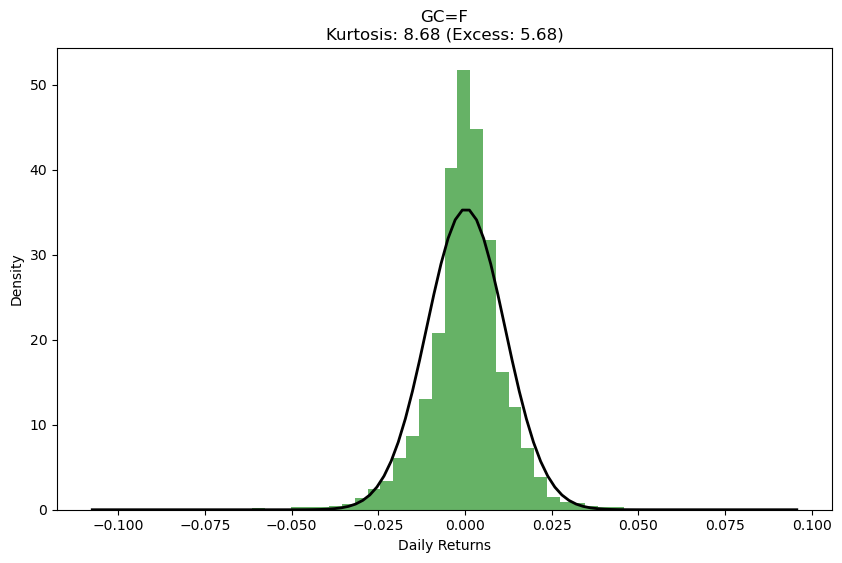

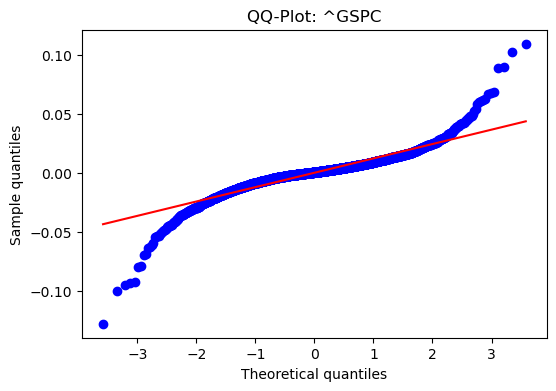

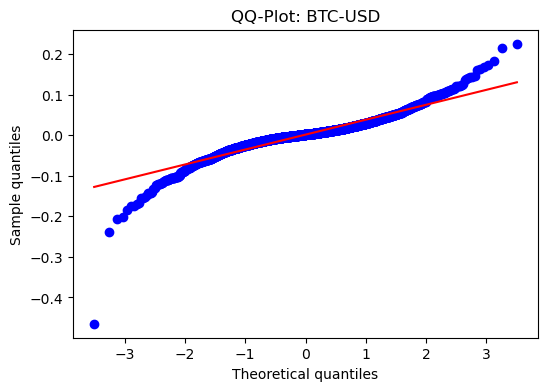

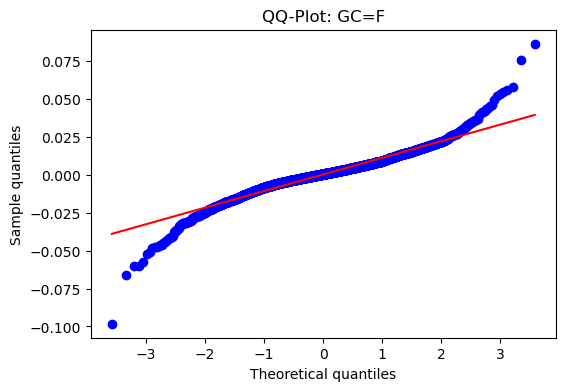

[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

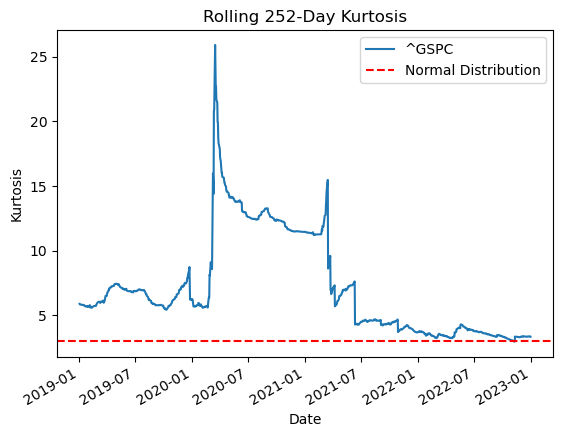

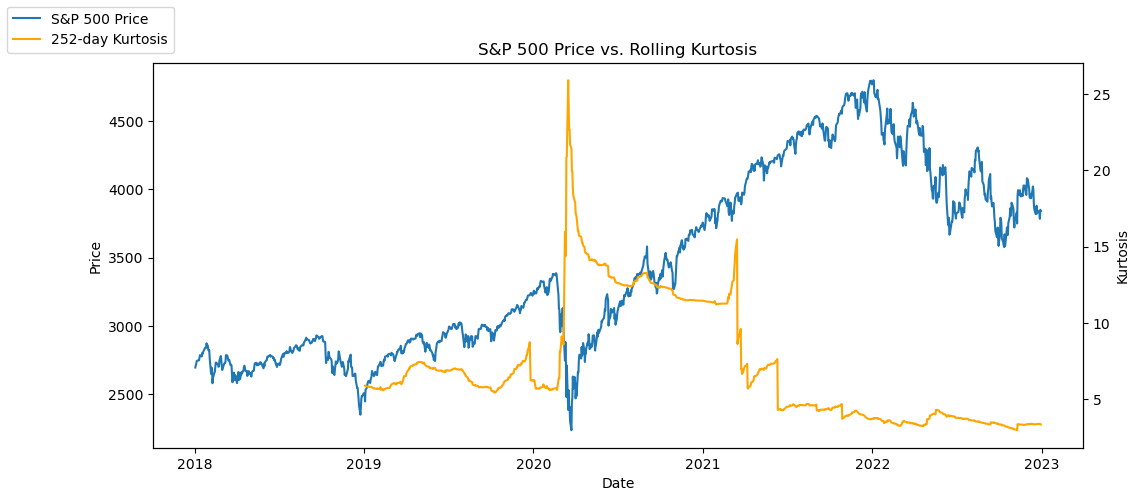

In [37]:
# Task 4

import scipy.stats as stats


assets = ['^GSPC', 'BTC-USD', 'GC=F']

results_ext = compare_assets(assets, '2007-01-01', '2023-01-01')

# QQ-plot for each asset
for asset, info in results_ext.items():
    returns = info['returns']
    plt.figure(figsize=(6, 4))
    stats.probplot(returns.to_numpy().ravel(), dist="norm", plot=plt)
    plt.title(f"QQ-Plot: {asset}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Sample quantiles")
    plt.show()

#  Overlay price & rolling kurtosis (twin-axis)
prices = download_data('^GSPC', '2018-01-01', '2023-01-01')
rk = rolling_kurtosis(calculate_returns(prices), window=252)

fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()
ax1.plot(prices.index, prices, label='S&P 500 Price')
ax2.plot(rk.index, rk,   label='252-day Kurtosis', color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('Kurtosis')
fig.legend(loc='upper left')
plt.title("S&P 500 Price vs. Rolling Kurtosis")
plt.show()


In [ ]:
""" 
5. Advanced Modeling:

Simulate normal returns with the same mean/std as your data and compare kurtosis

Research and implement methods to deal with high kurtosis in financial modeling"""

In [ ]:
#Task 5
sim_stats = {}
for asset, s in results_ext.items():
    r = s['returns']
    mu, sigma = r.mean(), r.std()
    sim = np.random.normal(mu, sigma, size=len(r))
    sim_k = kurtosis(sim, fisher=False)
    sim_stats[asset] = sim_k
    print(f"{asset}: Empirical kurtosis = {kurtosis(r, fisher=False)},"
          f" Simulated normal = {sim_k:.2f}")





^GSPC: Empirical kurtosis = [14.80830378], Simulated normal = 2.95
BTC-USD: Empirical kurtosis = [13.85675536], Simulated normal = 3.02
GC=F: Empirical kurtosis = [8.67745535], Simulated normal = 2.99


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from scipy.stats import kurtosis, t, genpareto
from arch import arch_model

# 1) Download returns for each asset
def get_returns(ticker, start='2018-01-01', end='2023-01-01'):
    prices = yf.download(ticker, start=start, end=end, auto_adjust=True)['Close']
    return np.log(prices / prices.shift(1)).dropna()

assets = {'SPX': '^GSPC', 'BTC': 'BTC-USD', 'Gold': 'GC=F'}
returns = {name: get_returns(t) for name, t in assets.items()}


# 2) Robust Distribution: fit Student’s t and compare kurtosis
t_params = {}
for name, r in returns.items():
    ν, μ, σ = t.fit(r)              # fit t(ν, μ, σ)
    t_kurt   = t.stats(ν, moments='kurtosis')
    t_params[name] = {'df': ν, 'loc': μ, 'scale': σ, 'kurtosis': t_kurt}
print("Student’s t fits:", pd.DataFrame(t_params).T)


# 3) Heavy-Tail Volatility: GARCH(1,1) with t-innovations
garch_results = {}
for name, r in returns.items():
    am = arch_model(r*100, vol='GARCH', p=1, q=1, dist='t')
    res = am.fit(disp='off')
    garch_results[name] = {
        'ω': res.params['omega'],
        'α': res.params['alpha[1]'],
        'β': res.params['beta[1]'],
        'df': res.params['nu']
    }
print("\nGARCH-t parameters:", pd.DataFrame(garch_results).T)


# 4) EVT: fit Generalized Pareto to the top 5% tail
evt_params = {}
for name, r in returns.items():
    thr       = np.percentile(r, 95)
    excess    = r[r > thr] - thr
    c, loc, scale = genpareto.fit(excess)
    evt_params[name] = {'shape': c, 'loc': loc, 'scale': scale}
print("\nEVT GPD fits:", pd.DataFrame(evt_params).T)


# 5) Robust Risk Measure: CVaR at 95%
cvar = {}
α    = 0.05
for name, r in returns.items():
    var  = np.quantile(r, α)
    cvar[name] = r[r <= var].mean()
print("\n95% CVaR:", cvar)


# 6) Data Preprocessing: Winsorize at 1st/99th percentile
wins_kurt = {}
for name, r in returns.items():
    low, high    = np.percentile(r, [1, 99])
    wins          = r.clip(low, high)
    wins_kurt[name] = {
        'raw_kurt': kurtosis(r, fisher=False, bias=False),
        'wins_kurt': kurtosis(wins, fisher=False, bias=False)
    }
print("\nKurtosis before/after winsorization:", pd.DataFrame(wins_kurt).T)


[*********************100%***********************]  1 of 1 completed


^GSPC Kurtosis Analysis:
Actual Kurtosis: 15.8919
Excess Kurtosis: 12.8919


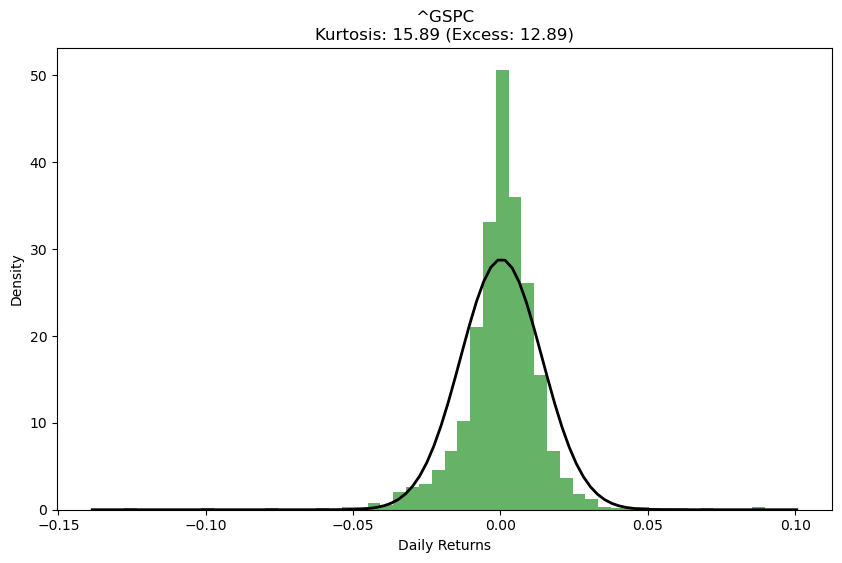

[*********************100%***********************]  1 of 1 completed



BTC-USD Kurtosis Analysis:
Actual Kurtosis: 16.2056
Excess Kurtosis: 13.2056


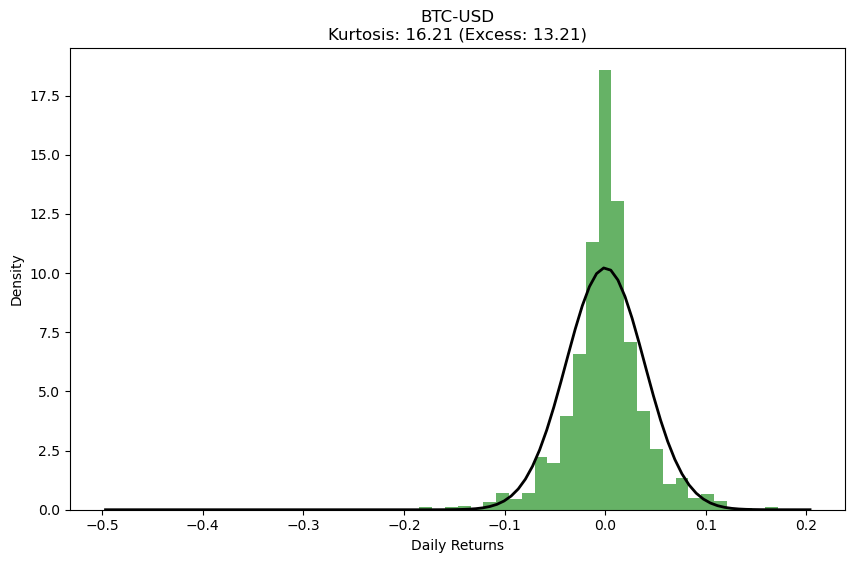

[*********************100%***********************]  1 of 1 completed



GC=F Kurtosis Analysis:
Actual Kurtosis: 7.8054
Excess Kurtosis: 4.8054


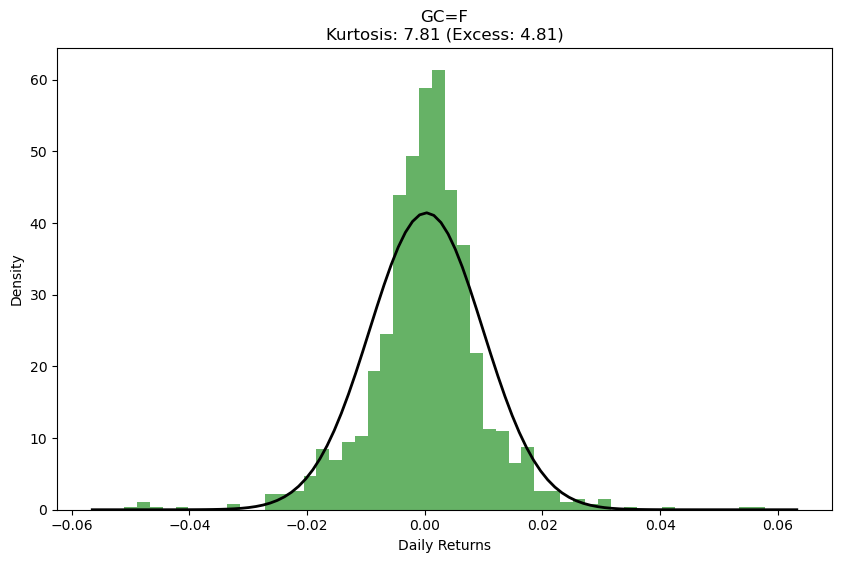


--- Winsorization Impact (1st/99th percentile) ---

^GSPC BEFORE winsorization:

^GSPC Kurtosis Analysis:
Actual Kurtosis: 15.8919
Excess Kurtosis: 12.8919


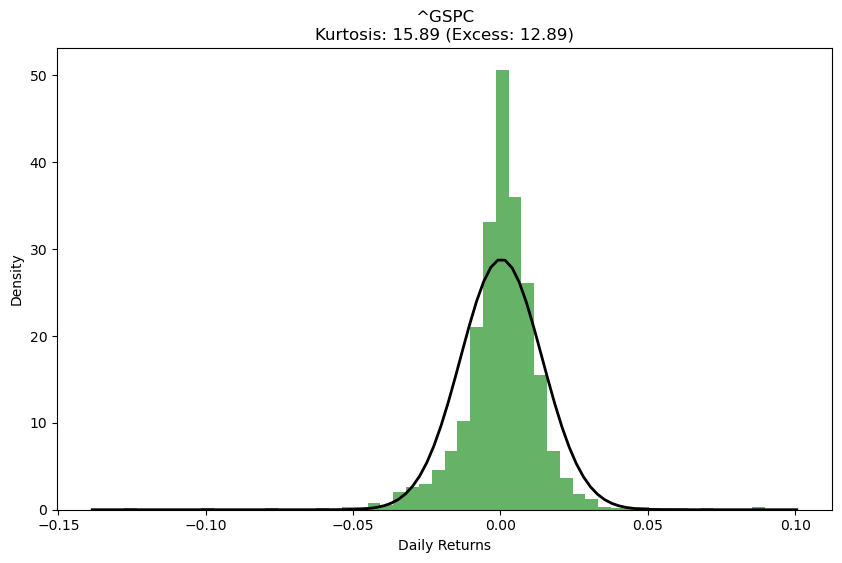

^GSPC AFTER winsorization:

^GSPC (winsorized) Kurtosis Analysis:
Actual Kurtosis: 4.5461
Excess Kurtosis: 1.5461


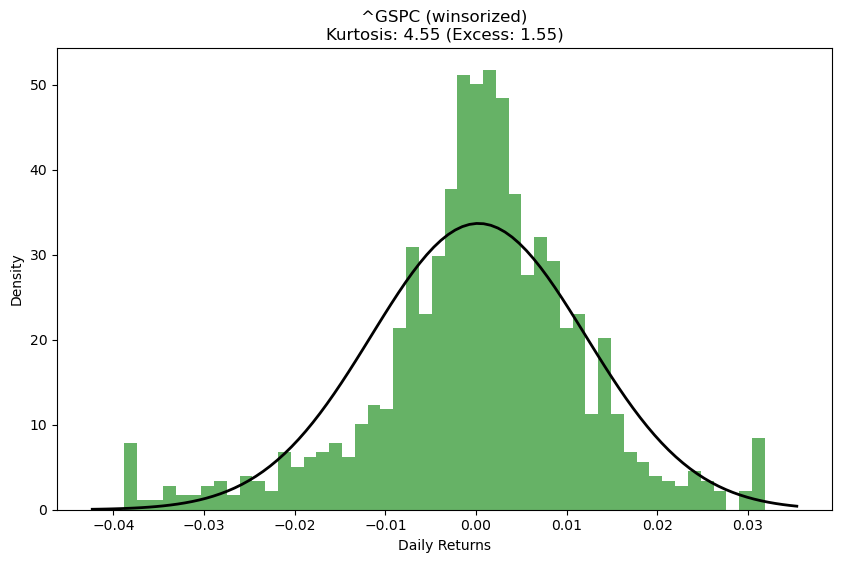


BTC-USD BEFORE winsorization:

BTC-USD Kurtosis Analysis:
Actual Kurtosis: 16.2056
Excess Kurtosis: 13.2056


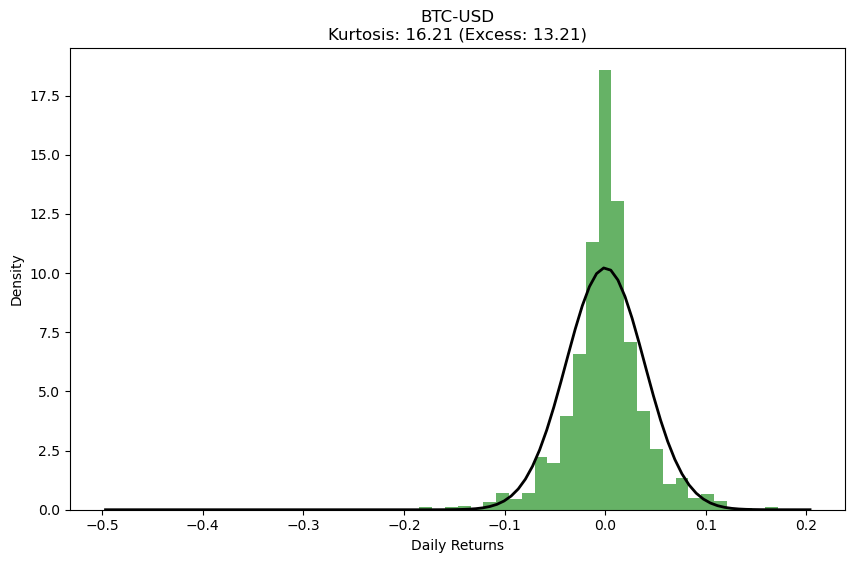

BTC-USD AFTER winsorization:

BTC-USD (winsorized) Kurtosis Analysis:
Actual Kurtosis: 4.5836
Excess Kurtosis: 1.5836


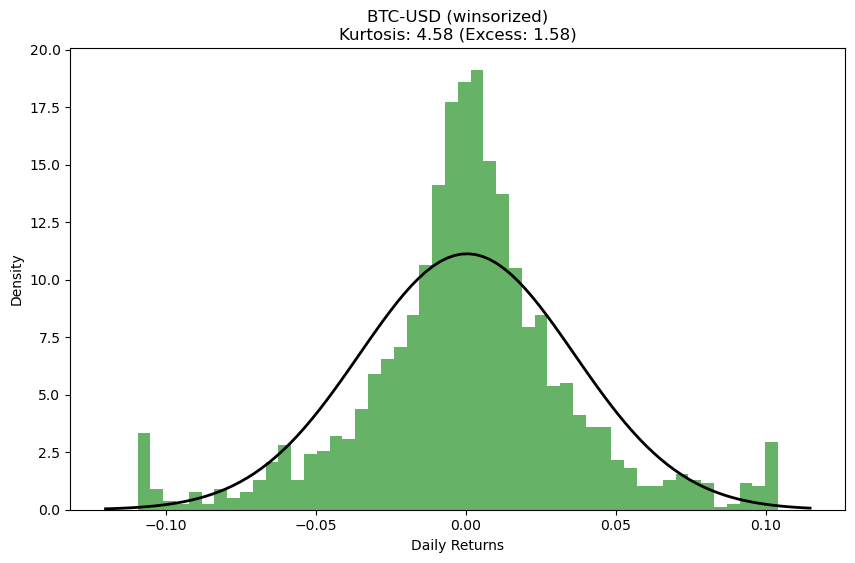


GC=F BEFORE winsorization:

GC=F Kurtosis Analysis:
Actual Kurtosis: 7.8054
Excess Kurtosis: 4.8054


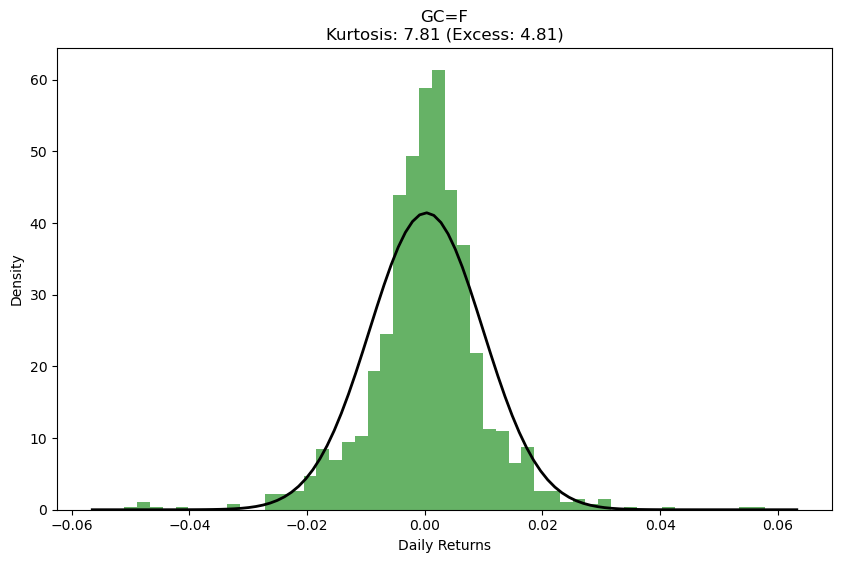

GC=F AFTER winsorization:

GC=F (winsorized) Kurtosis Analysis:
Actual Kurtosis: 4.0240
Excess Kurtosis: 1.0240


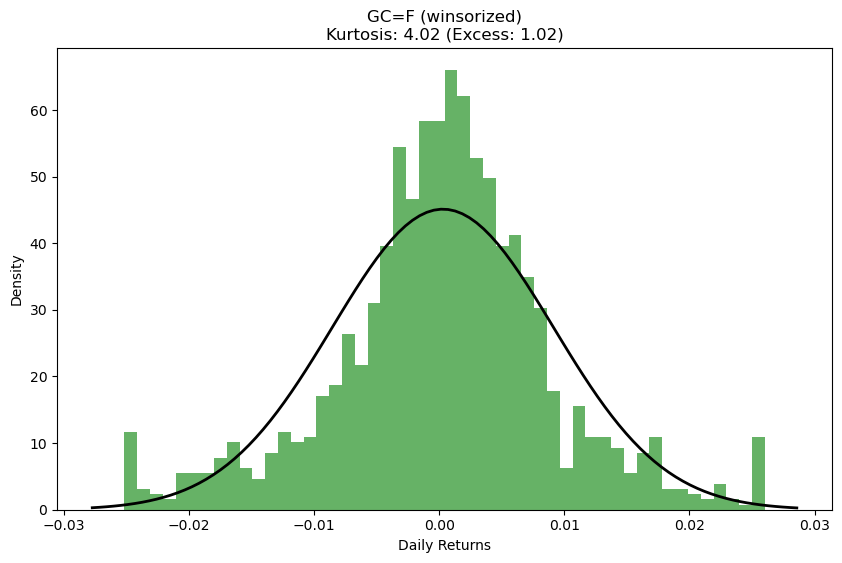

In [ ]:

assets     = ['^GSPC', 'BTC-USD', 'GC=F']     
start_date = '2018-01-01'
end_date   = '2023-01-01'

results = compare_assets(assets, start_date, end_date)


# Winsorization Impact (1st/99th percentile) 
for asset, info in results.items():

    r = info['returns'].dropna()

    q = r.quantile([0.01, 0.99]).values  
    low, high = q[0], q[1]


    wins = r.clip(lower=low, upper=high)


    print(f"\n{asset} BEFORE winsorization:")
    analyze_kurtosis(r, asset)

    print(f"{asset} AFTER winsorization:")
    analyze_kurtosis(wins, f"{asset} (winsorized)")


[*********************100%***********************]  1 of 1 completed


^GSPC Kurtosis Analysis:
Actual Kurtosis: 15.8919
Excess Kurtosis: 12.8919


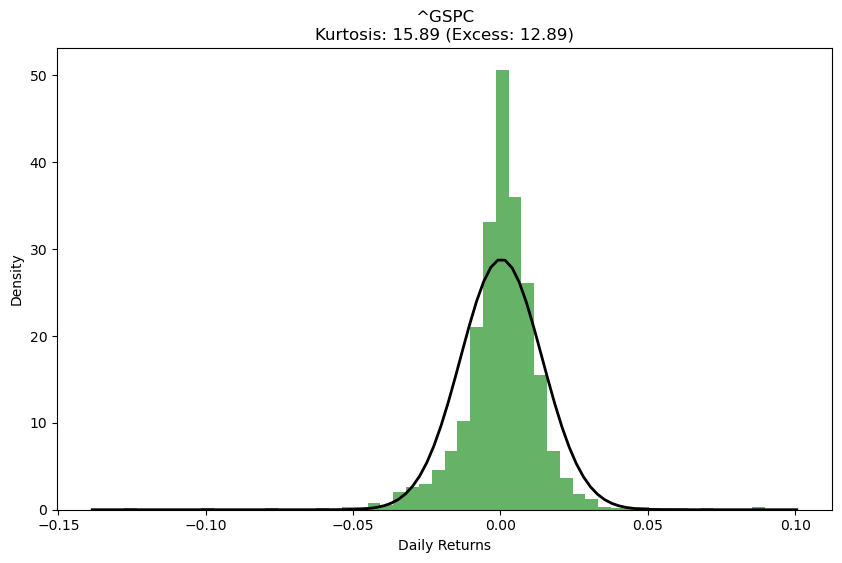

[*********************100%***********************]  1 of 1 completed


BTC-USD Kurtosis Analysis:
Actual Kurtosis: 16.2056
Excess Kurtosis: 13.2056


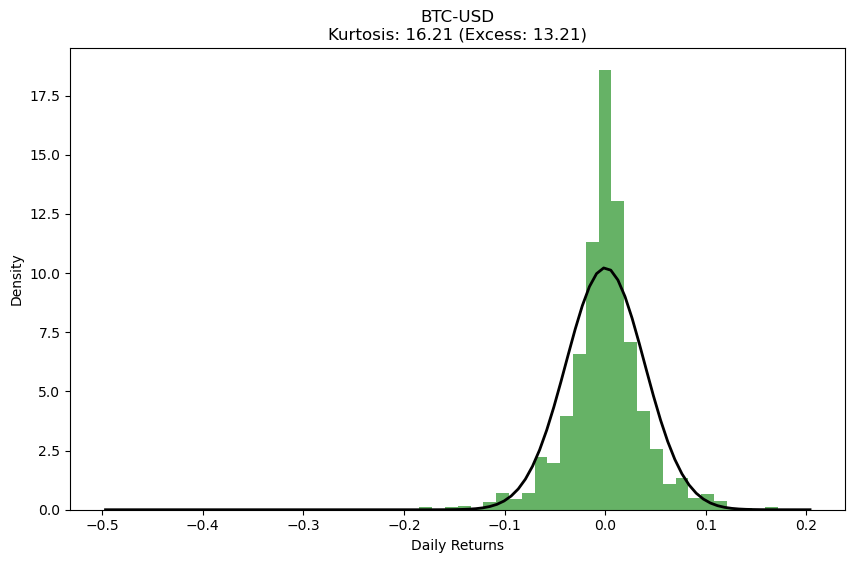

[*********************100%***********************]  1 of 1 completed



GC=F Kurtosis Analysis:
Actual Kurtosis: 7.8054
Excess Kurtosis: 4.8054


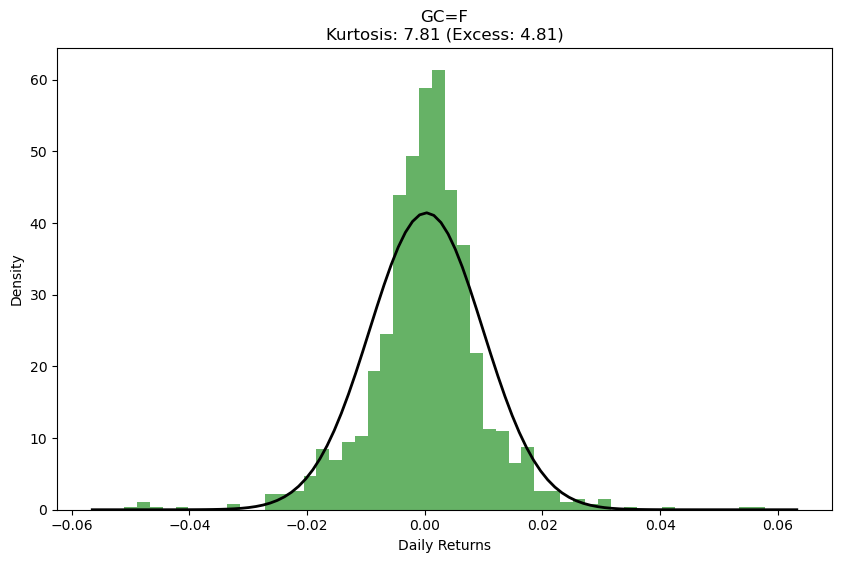


^GSPC — BEFORE Yeo–Johnson:

^GSPC (raw) Kurtosis Analysis:
Actual Kurtosis: 15.8919
Excess Kurtosis: 12.8919


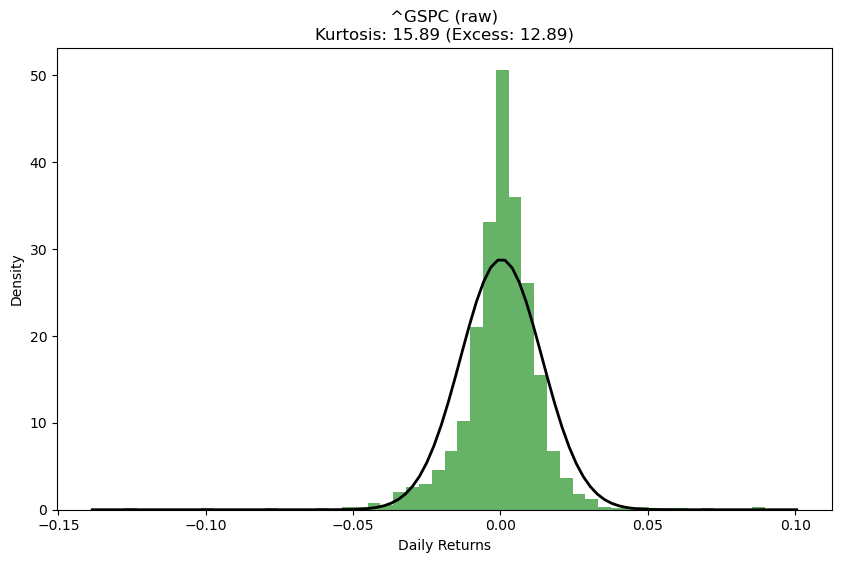

^GSPC — AFTER Yeo–Johnson:

^GSPC (YJ) Kurtosis Analysis:
Actual Kurtosis: 14.3926
Excess Kurtosis: 11.3926


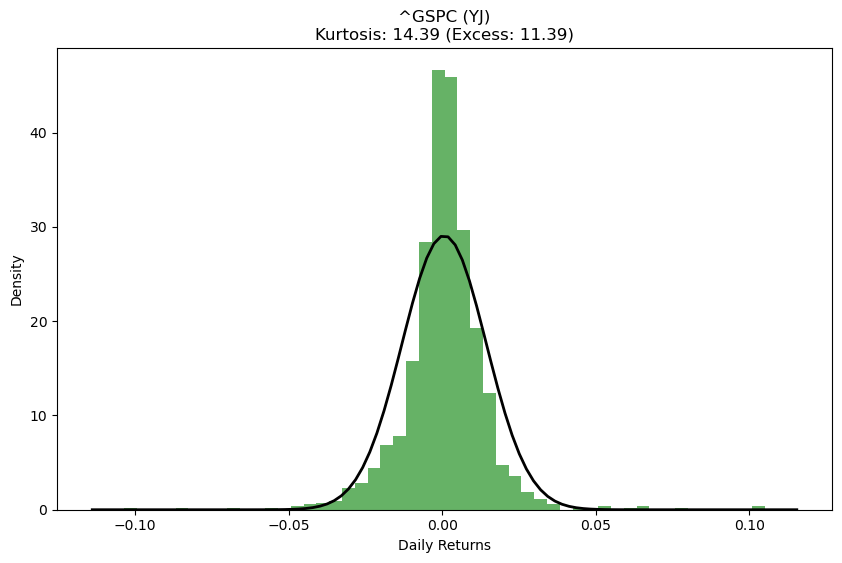


BTC-USD — BEFORE Yeo–Johnson:

BTC-USD (raw) Kurtosis Analysis:
Actual Kurtosis: 16.2056
Excess Kurtosis: 13.2056


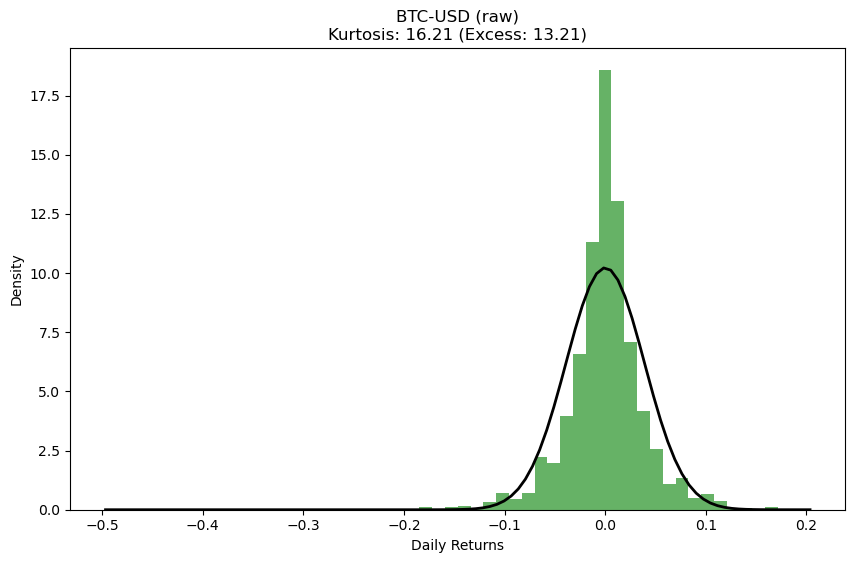

BTC-USD — AFTER Yeo–Johnson:

BTC-USD (YJ) Kurtosis Analysis:
Actual Kurtosis: 8.0986
Excess Kurtosis: 5.0986


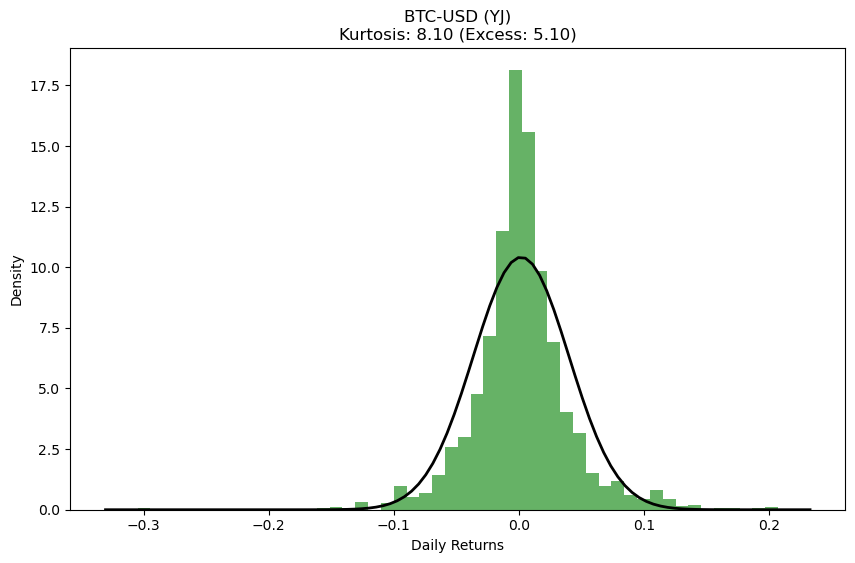


GC=F — BEFORE Yeo–Johnson:

GC=F (raw) Kurtosis Analysis:
Actual Kurtosis: 7.8054
Excess Kurtosis: 4.8054


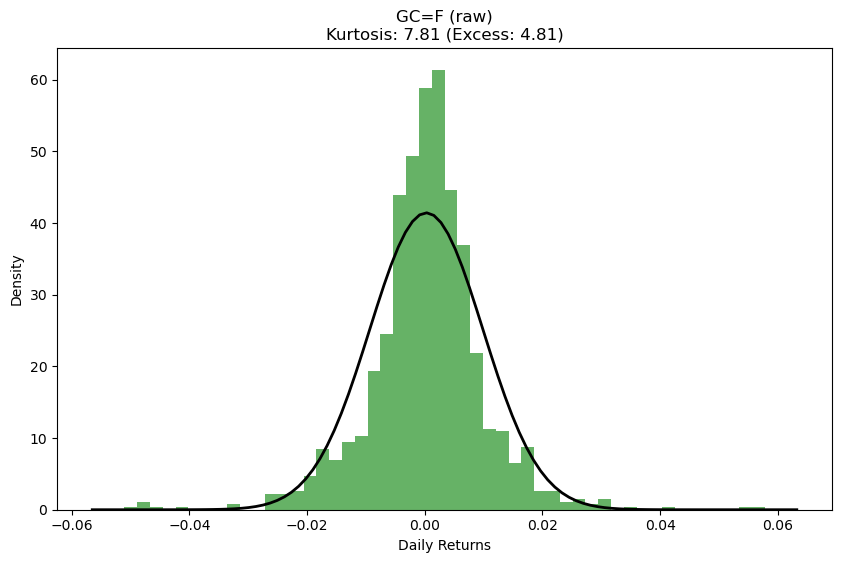

GC=F — AFTER Yeo–Johnson:

GC=F (YJ) Kurtosis Analysis:
Actual Kurtosis: 7.9460
Excess Kurtosis: 4.9460


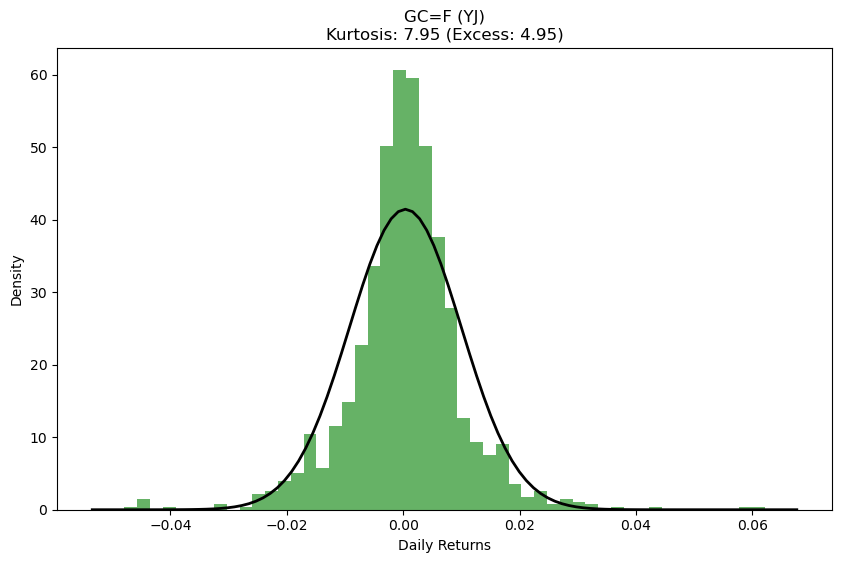

In [ ]:
from sklearn.preprocessing import PowerTransformer


assets     = ['^GSPC', 'BTC-USD', 'GC=F']
start_date = '2018-01-01'
end_date   = '2023-01-01'
results    = compare_assets(assets, start_date, end_date)

# 2) Apply Yeo-Johnson and compare kurtosis
pt = PowerTransformer(method='yeo-johnson', standardize=False)

for asset, info in results.items():
    r = info['returns'].dropna()

    print(f"\n{asset} — BEFORE Yeo–Johnson:")
    analyze_kurtosis(r, f"{asset} (raw)")

    arr = r.to_numpy().reshape(-1, 1)

    trans_arr = pt.fit_transform(arr).flatten()
    r_trans   = pd.Series(trans_arr, index=r.index)


    print(f"{asset} — AFTER Yeo–Johnson:")
    analyze_kurtosis(r_trans, f"{asset} (YJ)")
